In [93]:
import numpy as np

In [94]:
# Hyperparameters dictionary
hyperparameters = {
    # Refusal
    'refusal_llama_3b_5k': {'layer': 12, 'use_bias': False, 'normalize': True, 'C': 0.001},
    'refusal_llama_3b_prompted_5k': {'layer': 12, 'use_bias': False, 'normalize': True, 'C': 0.001},
    'refusal_ministral_8b_5k': {'layer': 12, 'use_bias': False, 'normalize': True, 'C': 0.001},
    
    # Lists
    'lists_llama_3b_5k': {'layer': 9, 'use_bias': True, 'normalize': False, 'C': 1},
    'lists_llama_3b_prompted_5k': {'layer': 12, 'use_bias': True, 'normalize': False, 'C': 10},
    'lists_qwen_3b_5k': {'layer': 12, 'use_bias': False, 'normalize': False, 'C': 1},
    
    # Metaphors
    'metaphors_llama_3b_5k': {'layer': 9, 'use_bias': False, 'normalize': False, 'C': 1},
    'metaphors_llama_3b_prompted_5k': {'layer': 15, 'use_bias': False, 'normalize': False, 'C': 1},
    'metaphors_qwen_3b_5k': {'layer': 6, 'use_bias': True, 'normalize': False, 'C': 1},
    
    # Science
    'science_llama_3b_5k': {'layer': 12, 'use_bias': True, 'normalize': False, 'C': 1},
    'science_llama_3b_prompted_5k': {'layer': 9, 'use_bias': True, 'normalize': False, 'C': 1},
    'science_qwen_3b_5k': {'layer': 9, 'use_bias': True, 'normalize': False, 'C': 1},
    
    # Sycophancy
    'sycophancy_llama_3b_5k': {'layer': 12, 'use_bias': True, 'normalize': True, 'C': 0.01},
    'sycophancy_llama_3b_prompted_5k': {'layer': 12, 'use_bias': True, 'normalize': True, 'C': 0.01},
    'sycophancy_qwen_3b_5k': {'layer': 12, 'use_bias': False, 'normalize': True, 'C': 0.01}
}

In [95]:
TRAIN_AND_TEST_SETS = {
    "refusal": {
        "train": [
            "refusal_llama_3b_5k",
            "refusal_llama_3b_prompted_5k",
            "refusal_ministral_8b_5k",
        ],
        "test": [
            "refusal_llama_3b_5k",
            "refusal_llama_3b_prompted_5k",
            "refusal_ministral_8b_5k",
        ],
    },
    "lists": {
        "train": [
            "lists_llama_3b_5k",
            "lists_llama_3b_prompted_5k",
            "lists_qwen_3b_5k",
        ],
        "test": ["lists_llama_3b_1k", "lists_llama_3b_prompted_1k", "lists_qwen_3b_1k"],
    },
    "metaphors": {
        "train": [
            "metaphors_llama_3b_5k",
            "metaphors_llama_3b_prompted_5k",
            "metaphors_qwen_3b_5k",
        ],
        "test": [
            "metaphors_llama_3b_1k",
            "metaphors_llama_3b_prompted_1k",
            "metaphors_qwen_3b_1k",
        ],
    },
    "science": {
        "train": [
            "science_llama_3b_5k",
            "science_llama_3b_prompted_5k",
            "science_qwen_3b_5k",
        ],
        "test": [
            "science_llama_3b_1k",
            "science_llama_3b_prompted_1k",
            "science_qwen_3b_1k",
        ],
    }
}

In [96]:
# Load Probe experiment results
from probe_gen.probes.wandb_interface import load_probe_eval_dict_by_dict

#test_dataset_names = ["metaphors_brazil_llama_3b_1k", "metaphors_brazil_llama_3b_prompted_1k", "metaphors_brazil_qwen_3b_1k"]

#tick_labels = ['On (llama)', 'On (llama prompted)', 'Off (qwen)', 'Off (qwen prompted)']

behaviours = ["refusal", "lists", "metaphors", "science"]

on_policy_test_sets = {}
for behaviour in behaviours: 

    dataset_names = TRAIN_AND_TEST_SETS[behaviour]["train"]
    print(behaviour)
    test_dataset_names = TRAIN_AND_TEST_SETS[behaviour]["test"]

    print(dataset_names)

    layer_list = [hyperparameters[key]['layer'] for key in dataset_names]
    use_bias_list = [hyperparameters[key]['use_bias'] for key in dataset_names]
    normalize_list = [hyperparameters[key]['normalize'] for key in dataset_names]
    C_list = [hyperparameters[key]['C'] for key in dataset_names]

    activations_model = "llama_3b"

    metric = "roc_auc"


    results_table = np.full((len(dataset_names), len(dataset_names)), -1, dtype=float)

    for train_index in range(len(dataset_names)):
            for test_index in range(len(test_dataset_names)):
                results = load_probe_eval_dict_by_dict(
                    {
                        "config.train_dataset": dataset_names[train_index],
                        "config.test_dataset": test_dataset_names[test_index],
                        "config.layer": layer_list[train_index],
                        "config.probe/type": "mean",
                        "config.probe/use_bias": use_bias_list[train_index],
                        "config.probe/normalize": normalize_list[train_index],
                        "config.probe/C": C_list[train_index],
                        "config.activations_model": activations_model,
                        "state": "finished",  # Only completed runs
                    }
                )
                results_table[train_index, test_index] = results[metric]
                print(
                    f"{dataset_names[train_index]}, {test_dataset_names[test_index]}, {results[metric]}"
                )

    on_policy_test_sets[behaviour] = results_table[:, 0]
    


refusal
['refusal_llama_3b_5k', 'refusal_llama_3b_prompted_5k', 'refusal_ministral_8b_5k']
### WARNING ###: multiple runs for lookup dict {'config.train_dataset': 'refusal_llama_3b_5k', 'config.test_dataset': 'refusal_llama_3b_5k', 'config.layer': 12, 'config.probe/type': 'mean', 'config.probe/use_bias': False, 'config.probe/normalize': True, 'config.probe/C': 0.001, 'config.activations_model': 'llama_3b', 'state': 'finished'}, returning latest.
refusal_llama_3b_5k, refusal_llama_3b_5k, 0.937048
refusal_llama_3b_5k, refusal_llama_3b_prompted_5k, 0.879856
refusal_llama_3b_5k, refusal_ministral_8b_5k, 0.960144
refusal_llama_3b_prompted_5k, refusal_llama_3b_5k, 0.929368
### WARNING ###: multiple runs for lookup dict {'config.train_dataset': 'refusal_llama_3b_prompted_5k', 'config.test_dataset': 'refusal_llama_3b_prompted_5k', 'config.layer': 12, 'config.probe/type': 'mean', 'config.probe/use_bias': False, 'config.probe/normalize': True, 'config.probe/C': 0.001, 'config.activations_model':

In [97]:
on_policy_test_sets

{'refusal': array([0.937048, 0.929368, 0.928076]),
 'lists': array([0.969984, 0.966224, 0.968028]),
 'metaphors': array([0.942576, 0.931684, 0.941004]),
 'science': array([0.956548, 0.957968, 0.957288])}

In [98]:
# Load or get perplexity 

from probe_gen.analysis import load_perplexities

model_name = 'llama_3b'
behaviour = 'metaphors'

perplexities = {} 

for behaviour in behaviours:
    dataset_names = TRAIN_AND_TEST_SETS[behaviour]["train"]
    perplexities_on = load_perplexities(behaviour, model_name, dataset_names[0].replace(behaviour, "").replace("_", "", 1) )
    perplexities_on_prompted = load_perplexities(behaviour, model_name, dataset_names[1].replace(behaviour, "").replace("_", "", 1) )
    perplexities_off = load_perplexities(behaviour, model_name, dataset_names[2].replace(behaviour, "").replace("_", "", 1))


    perplexities_on_mean = np.mean(perplexities_on)
    perplexities_on_prompted_mean = np.mean(perplexities_on_prompted)
    perplexities_off_mean = np.mean(perplexities_off)

    perplexities[behaviour] = [perplexities_on_mean, perplexities_on_prompted_mean, perplexities_off_mean] 


In [99]:
perplexities

{'refusal': [np.float64(3.787771259689331),
  np.float64(12757.517632628584),
  np.float64(60.10086087114811)],
 'lists': [np.float64(2.2299852377891543),
  np.float64(2.446009966158867),
  np.float64(5.813478327870369)],
 'metaphors': [np.float64(2.2564241428136826),
  np.float64(3.4723229056119918),
  np.float64(6.213809450268745)],
 'science': [np.float64(2.162458135509491),
  np.float64(2.500702361536026),
  np.float64(5.252705902743339)]}

refusal: r = -0.384, p = 0.749
lists: r = -0.077, p = 0.951
metaphors: r = 0.085, p = 0.946
science: r = 0.124, p = 0.921


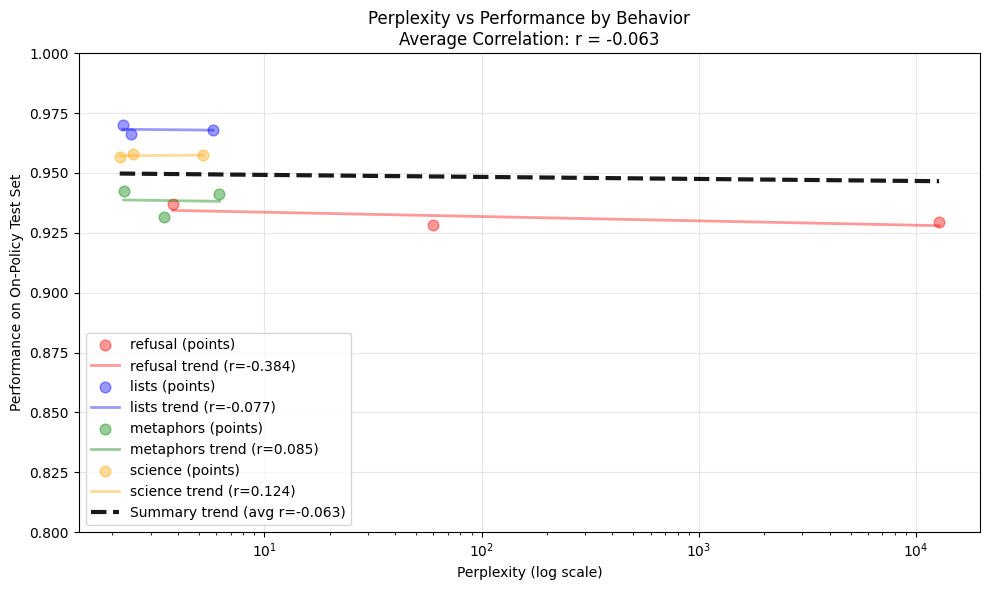


Summary correlation (average of behaviors): r = -0.063
Individual correlations: ['-0.384', '-0.077', '0.085', '0.124']
Number of behaviors: 4


In [100]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr

# Colors for each behavior
colors = ['red', 'blue', 'green', 'orange']
behavior_names = list(on_policy_test_sets.keys())

# Create the plot
plt.figure(figsize=(10, 6))

# Plot each behavior
for i, behavior in enumerate(behavior_names):
    x = perplexities[behavior]
    y = on_policy_test_sets[behavior]
    
    # Plot scatter points with lower opacity
    plt.scatter(x, y, color=colors[i], label=f'{behavior} (points)', s=60, alpha=0.4)
    
    # Calculate correlation and trend line for this behavior
    r, p_value = pearsonr(x, y)
    print(f"{behavior}: r = {r:.3f}, p = {p_value:.3f}")
    
    # Fit trend line in log space for this behavior
    log_x = np.log10(x)
    z = np.polyfit(log_x, y, 1)  # Linear fit in log space
    p_behavior = np.poly1d(z)
    
    # Create smooth line for this behavior's trend
    x_range = np.logspace(np.log10(min(x)), np.log10(max(x)), 100)
    log_x_range = np.log10(x_range)
    y_trend = p_behavior(log_x_range)
    
    # Plot the correlation line for this behavior with lower opacity
    plt.plot(x_range, y_trend, color=colors[i], linestyle='-', linewidth=2, 
             alpha=0.4, label=f'{behavior} trend (r={r:.3f})')

# Flatten all data for range calculations
all_perplexities = [val for behavior_vals in perplexities.values() for val in behavior_vals]
all_performances = [val for behavior_vals in on_policy_test_sets.values() for val in behavior_vals]

# Calculate average trend line from individual behavior trends
# Collect all individual trend coefficients
individual_slopes = []
individual_intercepts = []
individual_correlations = []

for behavior in behavior_names:
    x = perplexities[behavior]
    y = on_policy_test_sets[behavior]
    log_x = np.log10(x)
    z = np.polyfit(log_x, y, 1)  # Linear fit in log space
    individual_slopes.append(z[0])
    individual_intercepts.append(z[1])
    r, _ = pearsonr(x, y)
    individual_correlations.append(r)

# Average the trend coefficients to get summary trend
avg_slope = np.mean(individual_slopes)
avg_intercept = np.mean(individual_intercepts)
avg_correlation = np.mean(individual_correlations)

# Create smooth line for the average trend
x_smooth = np.logspace(np.log10(min(all_perplexities)), np.log10(max(all_perplexities)), 100)
log_x_smooth = np.log10(x_smooth)
y_summary = avg_slope * log_x_smooth + avg_intercept

plt.plot(x_smooth, y_summary, 'black', linestyle='--', linewidth=3, 
         label=f'Summary trend (avg r={avg_correlation:.3f})', alpha=0.9)

# Formatting
plt.ylim(0.8, 1)
plt.xlabel('Perplexity')
plt.ylabel('Performance on On-Policy Test Set')
plt.title(f'Perplexity vs Performance by Behavior\nAverage Correlation: r = {avg_correlation:.3f}')
plt.legend()
plt.grid(True, alpha=0.3)

# Use log scale for x-axis due to wide range in perplexities
plt.xscale('log')
plt.xlabel('Perplexity (log scale)')

plt.tight_layout()
plt.show()

# Print summary statistics
print(f"\nSummary correlation (average of behaviors): r = {avg_correlation:.3f}")
print(f"Individual correlations: {[f'{r:.3f}' for r in individual_correlations]}")
print(f"Number of behaviors: {len(behavior_names)}")